<a href="https://colab.research.google.com/github/JayddieTech/cirrhosis/blob/main/Copy_of_cirrhosis1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Title:Clustering and Analysis of Cirrhosis Data for Enhanced Patient and Targeted Medical Interventions

Problem Statement:
Understanding Clusters of Cirrhosis Patients Based on Key Health Metrics

Objective:
1. Evaluate Epidemiology:
2. Identify Risk Factor contributing to liver cirrhosis,Assess Outcomes
3. Evaluate Interventions,Formulate Recommendations:

# ***Data Understanding and Preparation***

**1. Data Exploration**


In [ ]:
#Data loading
import pandas as pd
data=pd.read_csv('/content/cirrhosis.csv')
data.head()

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,1,400,D,D-penicillamine,21464,F,Y,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
1,2,4500,C,D-penicillamine,20617,F,N,Y,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
2,3,1012,D,D-penicillamine,25594,M,N,N,N,S,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
3,4,1925,D,D-penicillamine,19994,F,N,Y,Y,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
4,5,1504,CL,Placebo,13918,F,N,Y,Y,N,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0


Cirrhosis Dataset
The dataset you provided contains various columns related to medical data for patients with cirrhosis. A breakdown of what the column names suggest is as follows:
1.	ID: An identifier for each patient.
2.	N_Days: The number of days the patient was under observation or treatment.
3.	Status: Likely indicates the outcome status at the end of the study or the last checkup (e.g., 'C' could stand for 'Censored', 'D' for 'Deceased', 'CL' for 'Clinically improved').
4.	Drug: The medication given to the patient, such as 'D-penicillamine' or 'Placebo'.
5.	Age: The age of the patient, possibly in days if the number is large (possibly needs conversion depending on the context, like if it's meant to be in days since birth).
6.	Sex: Gender of the patient ('M' for male, 'F' for female).
7.	Ascites: Indicates the presence of ascites, which is the accumulation of fluid in the peritoneal cavity, a common complication in liver cirrhosis ('Y' for yes, 'N' for no).
8.	Hepatomegaly: Enlargement of the liver, another complication of liver disease ('Y' for yes, 'N' for no).
9.	Spiders: Refers to spider angiomas, a type of telangiectasia (small dilated blood vessels near the skin surface) associated with liver diseases ('Y' for yes, 'N' for no).
10.	Edema: Swelling caused by excess fluid trapped in the body's tissues ('Y' for yes, 'N' for no, 'S' might indicate severe or significant).
11.	Bilirubin: A chemical in blood that results from the normal breakdown of red blood cells, elevated levels can indicate liver disease. Expressed likely in mg/dL or another standard unit.
12.	Cholesterol: The level of cholesterol in the blood.
13.	Albumin: A protein made by the liver, and its measurement is an important marker of liver health.
14.	Copper: Measured because copper metabolism is often disrupted in liver disease.
15.	Alk_Phos (Alkaline Phosphatase): An enzyme related to the bile ducts; often elevated in liver disease.
16.	SGOT (Serum Glutamic-Oxaloacetic Transaminase, now more commonly known as AST, Aspartate Aminotransferase): An enzyme that is typically elevated in liver damage.
17.	Tryglicerides (Triglycerides): A type of fat (lipid) found in your blood.
18.	Platelets: Blood cells that help with clotting, which can be low in liver disease.
19.	Prothrombin: A measure of how quickly blood clots, a prolonged time can be indicative of liver issues.
20.	Stage: The stage of liver disease, often scaled from 1 (least severe) to 4 (most severe).
These columns cover a range of clinical data that can provide insights into the progression of liver disease, its complications, and the effects of treatment.



a) Review Data Types and Characteristics

In [ ]:
#Data types and xtics
data.info()



#view unique values for categorical columns
data['Status'].unique()
data['Sex'].unique()
data['Ascites'].unique()
data['Hepatomegaly'].unique()
data['Spiders'].unique()
data['Edema'].unique()
from sklearn.preprocessing import LabelEncoder

# Encode categorical variables
label_encoders = {}
for column in data.select_dtypes(include=['object']).columns:
    label_encoders[column] = LabelEncoder()
    data[column] = label_encoders[column].fit_transform(data[column])

# Verify encoding
data.head()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             418 non-null    int64  
 1   N_Days         418 non-null    int64  
 2   Status         418 non-null    object 
 3   Drug           312 non-null    object 
 4   Age            418 non-null    int64  
 5   Sex            418 non-null    object 
 6   Ascites        312 non-null    object 
 7   Hepatomegaly   312 non-null    object 
 8   Spiders        312 non-null    object 
 9   Edema          418 non-null    object 
 10  Bilirubin      418 non-null    float64
 11  Cholesterol    284 non-null    float64
 12  Albumin        418 non-null    float64
 13  Copper         310 non-null    float64
 14  Alk_Phos       312 non-null    float64
 15  SGOT           312 non-null    float64
 16  Tryglicerides  282 non-null    float64
 17  Platelets      407 non-null    float64
 18  Prothrombi

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,1,400,2,0,21464,0,1,1,1,2,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
1,2,4500,0,0,20617,0,0,1,1,0,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
2,3,1012,2,0,25594,1,0,0,0,1,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
3,4,1925,2,0,19994,0,0,1,1,1,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
4,5,1504,1,1,13918,0,0,1,1,0,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0


Cirrhosis Dataset
The dataset you provided contains various columns related to medical data for patients with cirrhosis. A breakdown of what the column names suggest is as follows:
1.	ID: An identifier for each patient.
2.	N_Days: The number of days the patient was under observation or treatment.
3.	Status: Likely indicates the outcome status at the end of the study or the last checkup (e.g., 'C' could stand for 'Censored', 'D' for 'Deceased', 'CL' for 'Clinically improved').
4.	Drug: The medication given to the patient, such as 'D-penicillamine' or 'Placebo'.
5.	Age: The age of the patient, possibly in days if the number is large (possibly needs conversion depending on the context, like if it's meant to be in days since birth).
6.	Sex: Gender of the patient ('M' for male, 'F' for female).
7.	Ascites: Indicates the presence of ascites, which is the accumulation of fluid in the peritoneal cavity, a common complication in liver cirrhosis ('Y' for yes, 'N' for no).
8.	Hepatomegaly: Enlargement of the liver, another complication of liver disease ('Y' for yes, 'N' for no).
9.	Spiders: Refers to spider angiomas, a type of telangiectasia (small dilated blood vessels near the skin surface) associated with liver diseases ('Y' for yes, 'N' for no).
10.	Edema: Swelling caused by excess fluid trapped in the body's tissues ('Y' for yes, 'N' for no, 'S' might indicate severe or significant).
11.	Bilirubin: A chemical in blood that results from the normal breakdown of red blood cells, elevated levels can indicate liver disease. Expressed likely in mg/dL or another standard unit.
12.	Cholesterol: The level of cholesterol in the blood.
13.	Albumin: A protein made by the liver, and its measurement is an important marker of liver health.
14.	Copper: Measured because copper metabolism is often disrupted in liver disease.
15.	Alk_Phos (Alkaline Phosphatase): An enzyme related to the bile ducts; often elevated in liver disease.
16.	SGOT (Serum Glutamic-Oxaloacetic Transaminase, now more commonly known as AST, Aspartate Aminotransferase): An enzyme that is typically elevated in liver damage.
17.	Tryglicerides (Triglycerides): A type of fat (lipid) found in your blood.
18.	Platelets: Blood cells that help with clotting, which can be low in liver disease.
19.	Prothrombin: A measure of how quickly blood clots, a prolonged time can be indicative of liver issues.
20.	Stage: The stage of liver disease, often scaled from 1 (least severe) to 4 (most severe).
These columns cover a range of clinical data that can provide insights into the progression of liver disease, its complications, and the effects of treatment.



In [ ]:
#view summary statistics for numerical columns
data.describe()


,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,284.000000,418.000000,310.000000,312.000000,312.000000,282.000000,407.000000,416.000000,412.000000
mean,209.500000,1917.782297,0.830144,0.875598,18533.351675,0.105263,0.564593,0.889952,0.722488,0.200957,3.220813,369.510563,3.497440,97.648387,1982.655769,122.556346,124.702128,257.024570,10.731731,3.024272
std,120.810458,1104.672992,0.955785,0.785863,3815.845055,0.307260,0.868798,0.778823,0.842243,0.506835,4.407506,231.944545,0.424972,85.613920,2140.388824,56.699525,65.148639,98.325585,1.022000,0.882042
min,1.000000,41.000000,0.000000,0.000000,9598.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.300000,120.000000,1.960000,4.000000,289.000000,26.350000,33.000000,62.000000,9.000000,1.000000
25%,105.250000,1092.750000,0.000000,0.000000,15644.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.800000,249.500000,3.242500,41.250000,871.500000,80.600000,84.250000,188.500000,10.000000,2.000000
50%,209.500000,1730.000000,0.000000,1.000000,18628.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.400000,309.500000,3.530000,73.000000,1259.000000,114.700000,108.000000,251.000000,10.600000,3.000000
75%,313.750000,2613.500000,2.000000,2.000000,21272.500000,0.000000,2.000000,2.000000,2.000000,0.000000,3.400000,400.000000,3.770000,123.000000,1980.000000,151.900000,151.000000,318.000000,11.100000,4.000000
max,418.000000,4795.000000,2.000000,2.000000,28650.000000,1.000000,2.000000,2.000000,2.000000,2.000000,28.000000,1775.000000,4.640000,588.000000,13862.400000,457.250000,598.000000,721.000000,18.000000,4.000000


The dataset consists of 418 entries with 20 columns, including a mix of numerical and categorical data. The data.info() method reveals that some columns like Drug, Ascites, Hepatomegaly, Spiders, Cholesterol, Copper, Alk_Phos, SGOT, Tryglicerides, Platelets, Prothrombin, and Stage contain missing values. The dataset contains both integer and floating-point numerical variables, as well as several categorical variables such as Status, Sex, Ascites, Hepatomegaly, Spiders, and Edema. The categorical variables were reviewed for their unique values to understand the distinct categories present in the dataset, which will inform the subsequent steps for preprocessing and analysis.

b) Address Preprocessing Needs

In [ ]:
#let us check for missing values
missing_values = data.isnull().sum()
print(missing_values)

ID                 0
N_Days             0
Status             0
Drug               0
Age                0
Sex                0
Ascites            0
Hepatomegaly       0
Spiders            0
Edema              0
Bilirubin          0
Cholesterol      134
Albumin            0
Copper           108
Alk_Phos         106
SGOT             106
Tryglicerides    136
Platelets         11
Prothrombin        2
Stage              6
dtype: int64


Based on the missing values check above, several columns in the dataset have missing values. Notably, the columns Drug, Ascites, Hepatomegaly, and Spiders each have 106 missing values. Additionally, the Cholesterol column has 134 missing entries, while Copper has 108 missing values. Other affected columns include Alk_Phos and SGOT, both with 106 missing values, and Tryglicerides with 136 missing values. A smaller number of missing values are present in Platelets (11), Prothrombin (2), and Stage (6). These missing values will need to be addressed through imputation.

In [ ]:
#Because age is in days convert it into years. The .25 takes care of leap years.
data['Age'] = (data['Age'] / 365.25).round()

#Handling missing values for numerical columns with mean/median
data['Cholesterol'].fillna(data['Cholesterol'].mean(), inplace=True)
data['Copper'].fillna(data['Copper'].mean(), inplace=True)
data['Alk_Phos'].fillna(data['Alk_Phos'].mean(), inplace=True)
data['SGOT'].fillna(data['SGOT'].mean(), inplace=True)
data['Tryglicerides'].fillna(data['Tryglicerides'].mean(), inplace=True)
data['Platelets'].fillna(data['Platelets'].mean(), inplace=True)
data['Prothrombin'].fillna(data['Prothrombin'].mean(), inplace=True)
data['Stage'].fillna(data['Stage'].mean(), inplace=True)

#Handle missing values for categorical columns with mode
categorical_cols = ['Drug', 'Ascites', 'Hepatomegaly', 'Spiders']
for col in categorical_cols:
    data[col].fillna(data[col].mode()[0], inplace=True)

#Verify if all missing values are filled
data.isna().sum()

,0
ID,0
N_Days,0
Status,0
Drug,0
Age,0
Sex,0
Ascites,0
Hepatomegaly,0
Spiders,0
Edema,0


Here we start by converting the Age column from days to years by dividing the values by 365.25 and this .25 is to account for leap years. Following this, missing values in numerical columns such as Cholesterol, Copper, Alk_Phos, SGOT, Tryglicerides, Platelets, Prothrombin, and Stage are imputed using the mean of each column. For categorical columns like Drug, Ascites, Hepatomegaly, and Spiders, the missing values are imputed using the mode (most frequent value) for each column.

Imputation was chosen over dropping the rows with missing values because removing rows could lead to a significant reduction in the dataset size, potentially affecting the reliability and generalizability of the analysis. By filling in the missing data, the dataset remains intact, preserving the sample size and ensuring that valuable information isn't lost. After these imputations, the code verifies that all missing values have been handled successfully, and the output confirms that no missing values remain in the dataset. This ensures the data is fully prepared for further analysis.

In [ ]:
#Saving the preprocessed data to a CSV file
preprocessed_file_path = 'preprocessed_cirrhosis.csv'
data.to_csv(preprocessed_file_path, index=False)

# Print confirmation
print(f"Preprocessed data saved as {preprocessed_file_path}")

Preprocessed data saved as preprocessed_cirrhosis.csv


**2. Data Visualization**

a) Visualize Distributions of Continuous Variables using Histograms

---



---



> Add blockquote



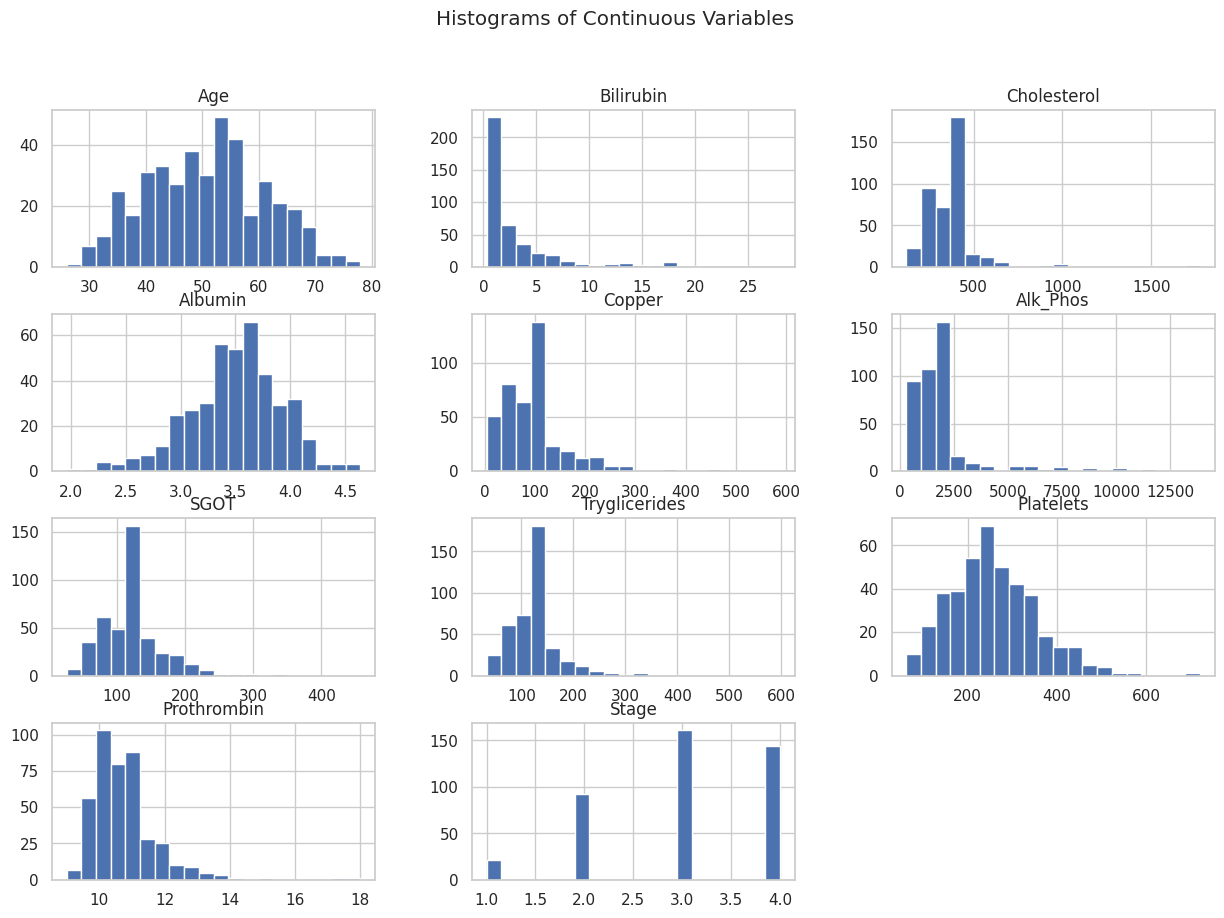

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for the plots
sns.set(style="whitegrid")

# List of continuous variables
continuous_vars = ['Age', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper',
                   'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin', 'Stage']

# Plot histograms
data[continuous_vars].hist(bins=20, figsize=(15, 10))
plt.suptitle("Histograms of Continuous Variables")
plt.show()



1. Age: The distribution of age is approximately normal, with most individuals clustered between 40 and 60 years old. The distribution is relatively symmetric, indicating a balanced spread of ages in the dataset.

2. Bilirubin: The histogram shows a highly right-skewed distribution with most individuals having low bilirubin levels. A few individuals have significantly elevated bilirubin, indicating potential outliers or severe liver issues among a small subset of the population.

3. Cholesterol: The cholesterol distribution is also right-skewed, with most individuals falling within the 200 to 600 range. There are a few extreme outliers with cholesterol levels exceeding 1000, which might represent high-risk cases.

4. Albumin: The albumin histogram appears to be roughly normally distributed, with most values falling between 3.0 and 4.5. This relatively symmetric distribution suggests a more uniform spread across the population.

5. Copper: The copper levels in the dataset display a right-skewed distribution, with most individuals showing levels below 200. There are a few outliers with much higher copper levels, indicating potential abnormal health conditions.

6. Alk_Phos: The histogram for Alk_Phos is heavily skewed to the right, with the majority of values concentrated below 3000. There are extreme outliers, some reaching as high as 14,000, suggesting significant variance in the dataset.

7. SGOT: SGOT shows a strong right skew with most individuals falling between 0 and 150. A few individuals have exceptionally high levels, indicating possible outliers related to liver or heart issues.

8. Tryglicerides: This histogram reveals a right-skewed distribution with most values falling between 100 and 300. Outliers with triglyceride levels exceeding 400 suggest potential cardiovascular risks for a subset of the population.

9. Platelets: Platelet count follows a slightly right-skewed distribution, with most values between 200 and 400. A few individuals have abnormally high platelet counts, which may indicate specific medical conditions.

10. Prothrombin: The prothrombin levels are right-skewed, with the majority of individuals having values between 10 and 12. There are a few outliers with levels beyond 14, suggesting coagulation abnormalities in a small subset of the population.

b) Create Box Plots to Identify Outliers in the Dataset



1. Age: The box plot of Age shows no significant outliers, with most data points spread between 30 and 80 years. This indicates that the distribution of Age is relatively normal and does not contain extreme values.

2. Bilirubin: The box plot of Bilirubin reveals a significant number of outliers, as values beyond 5 are considered extreme. This suggests that a subset of individuals has abnormally high Bilirubin levels, which could indicate liver dysfunction or other related conditions.

3. Cholesterol: The box plot of Cholesterol also displays numerous outliers, particularly for values above 600. These outliers may represent individuals with severely elevated cholesterol levels, potentially identifying a high-risk group for cardiovascular diseases.

4. Albumin: The box plot of Albumin shows a fairly normal distribution with only a few mild outliers below 2.5 and above 4.5. This suggests a relatively stable distribution with limited extreme values.

5. Copper: The Copper box plot identifies several outliers for values above 200, with extreme cases reaching as high as 600. These outliers might indicate abnormal copper accumulation in certain individuals, possibly due to rare metabolic disorders.

6. Alk_Phos: The box plot of Alk_Phos indicates a considerable number of extreme outliers above 2000, some of which exceed 10,000. These outliers suggest highly abnormal alkaline phosphatase levels, which could be associated with liver, bone, or bile duct disorders.

7. SGOT: Similar to other liver function markers, the SGOT box plot shows a number of outliers, particularly for values above 200. These outliers may represent individuals with acute liver damage or other related conditions.

8. Tryglicerides: The box plot of Tryglicerides highlights numerous outliers beyond 300, indicating that some individuals have significantly higher triglyceride levels, which may increase the risk of metabolic and cardiovascular diseases.

9. Platelets: The box plot of Platelets identifies a few outliers for values above 500, indicating that a small group of individuals may have unusually high platelet counts, potentially pointing to blood-related disorders.

10. Prothrombin: The Prothrombin box plot shows some outliers for values above 12, indicating that a few individuals may have abnormal blood clotting times, which could be clinically significant for coagulation disorders.

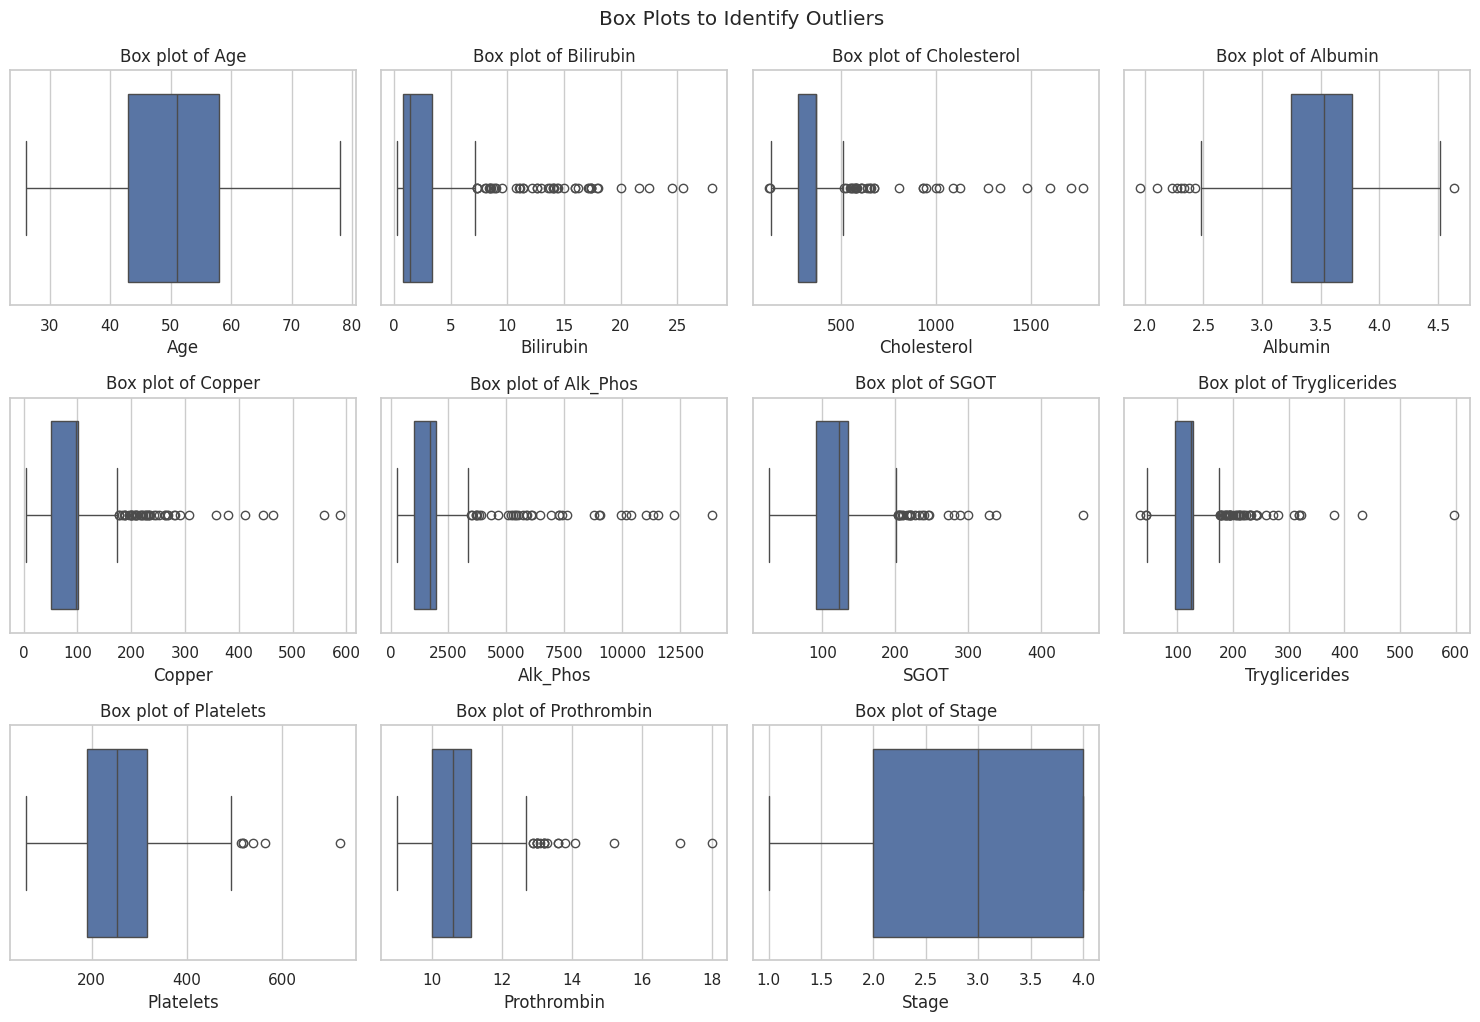

In [ ]:
import seaborn as sns
data=pd.read_csv('/content/preprocessed_cirrhosis.csv')
# Create box plots for continuous variables
plt.figure(figsize=(15, 10))

for i, var in enumerate(continuous_vars):
    plt.subplot(3, 4, i + 1)
    sns.boxplot(x=data[var])
    plt.title(f'Box plot of {var}')

plt.tight_layout()
plt.suptitle("Box Plots to Identify Outliers", y=1.02)
plt.show()

c) Plot Relationships Between Key Variables Using Scatter Plots

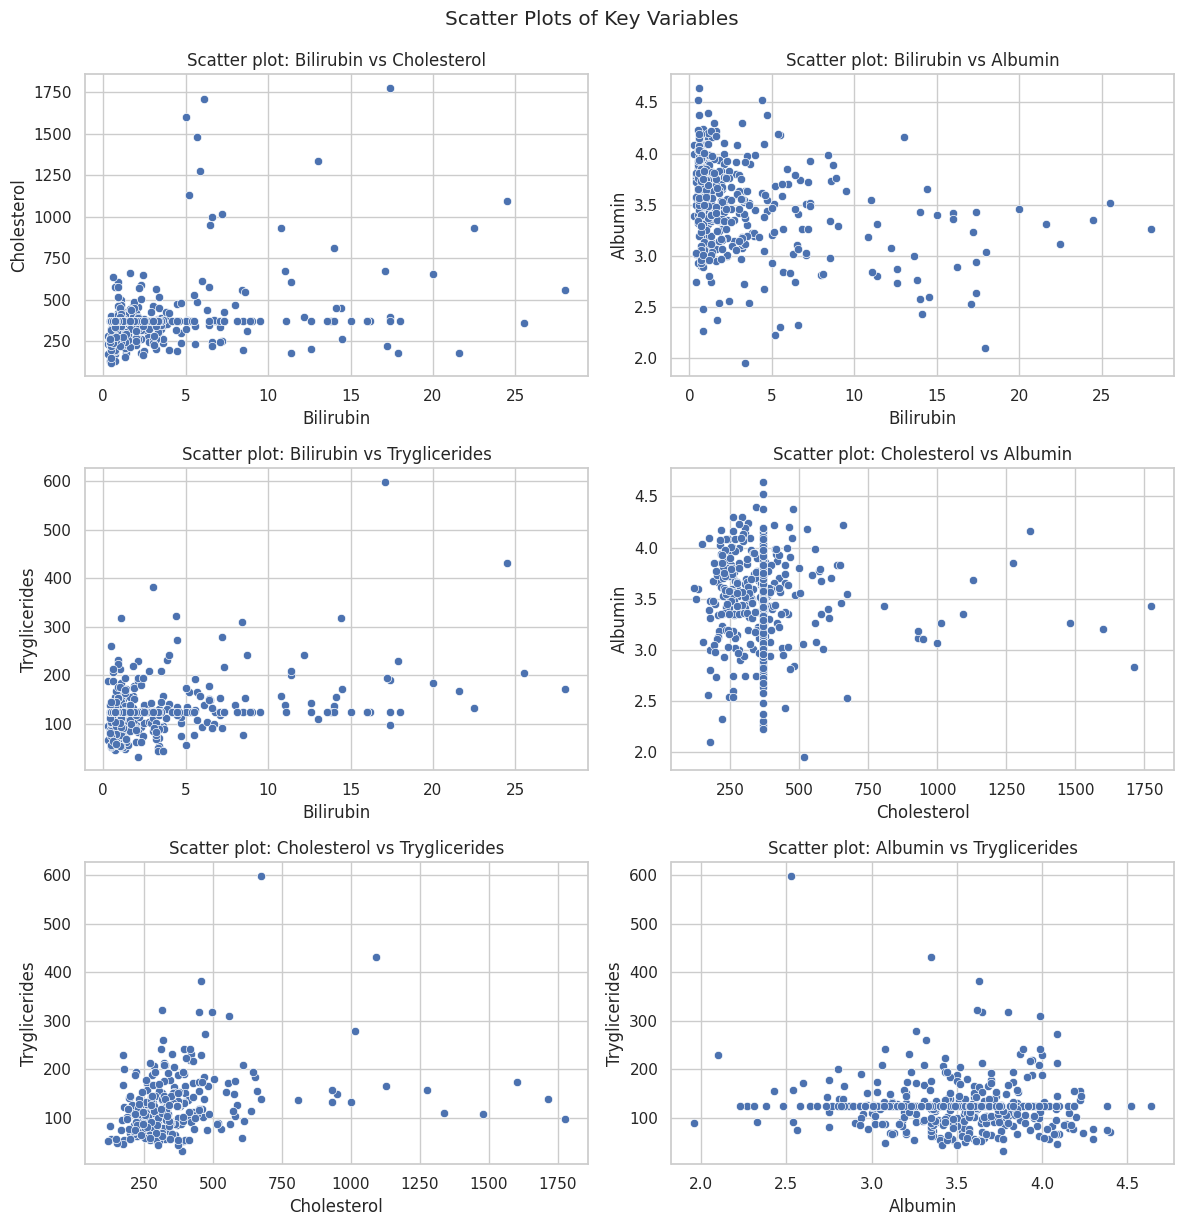

In [ ]:
# List of key variables for relationships
key_vars = ['Bilirubin', 'Cholesterol', 'Albumin', 'Tryglicerides']

# Calculate the number of scatter plots needed
num_plots = len(key_vars) * (len(key_vars) - 1) // 2

# Set up the grid dimensions for the plots
fig, axes = plt.subplots(nrows=num_plots//2, ncols=2, figsize=(12, 12))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot scatter plots to explore relationships
plot_idx = 0
for i, var1 in enumerate(key_vars):
    for j, var2 in enumerate(key_vars):
        if i < j:  # Avoid repeating plots and self-plots
            sns.scatterplot(x=data[var1], y=data[var2], ax=axes[plot_idx])
            axes[plot_idx].set_title(f'Scatter plot: {var1} vs {var2}')
            plot_idx += 1

plt.tight_layout()
plt.suptitle("Scatter Plots of Key Variables", y=1.02)
plt.show()


**Summary of Scatter Plots Showing Relationships Between Key Variables**

1. Bilirubin vs Cholesterol: The scatter plot shows that while most individuals have both lower Bilirubin and Cholesterol values, a subset of the population exhibits higher cholesterol levels, some exceeding 1000, along with elevated Bilirubin levels. The relationship between these two variables does not appear linear but highlights clusters of individuals with varying health profiles.

2. Albumin vs Copper: The scatter plot indicates a weak positive relationship between Albumin and Copper levels, with most data points concentrated between moderate Albumin (3.0–4.0) and low to moderate Copper levels (< 200). However, there are outliers with higher Copper levels that do not necessarily correspond to higher Albumin levels.

3. SGOT vs Triglycerides: The scatter plot reveals a moderate clustering of individuals with lower SGOT and Triglycerides. However, there are several outliers with higher SGOT values (above 200) and higher Triglycerides, suggesting a small group of individuals with potentially more significant metabolic issues.

4. Platelets vs Prothrombin: The scatter plot shows a concentration of data points around moderate Platelet and Prothrombin levels. Some outliers have elevated Prothrombin levels with varying Platelet counts, indicating possible coagulation or hematologic abnormalities in a subset of individuals.

5. Age vs Stage: The scatter plot of Age vs Stage demonstrates that individuals are grouped into distinct stages regardless of their age. There is no clear relationship between age and disease stage, as individuals at various stages span the full age range from 30 to 80.

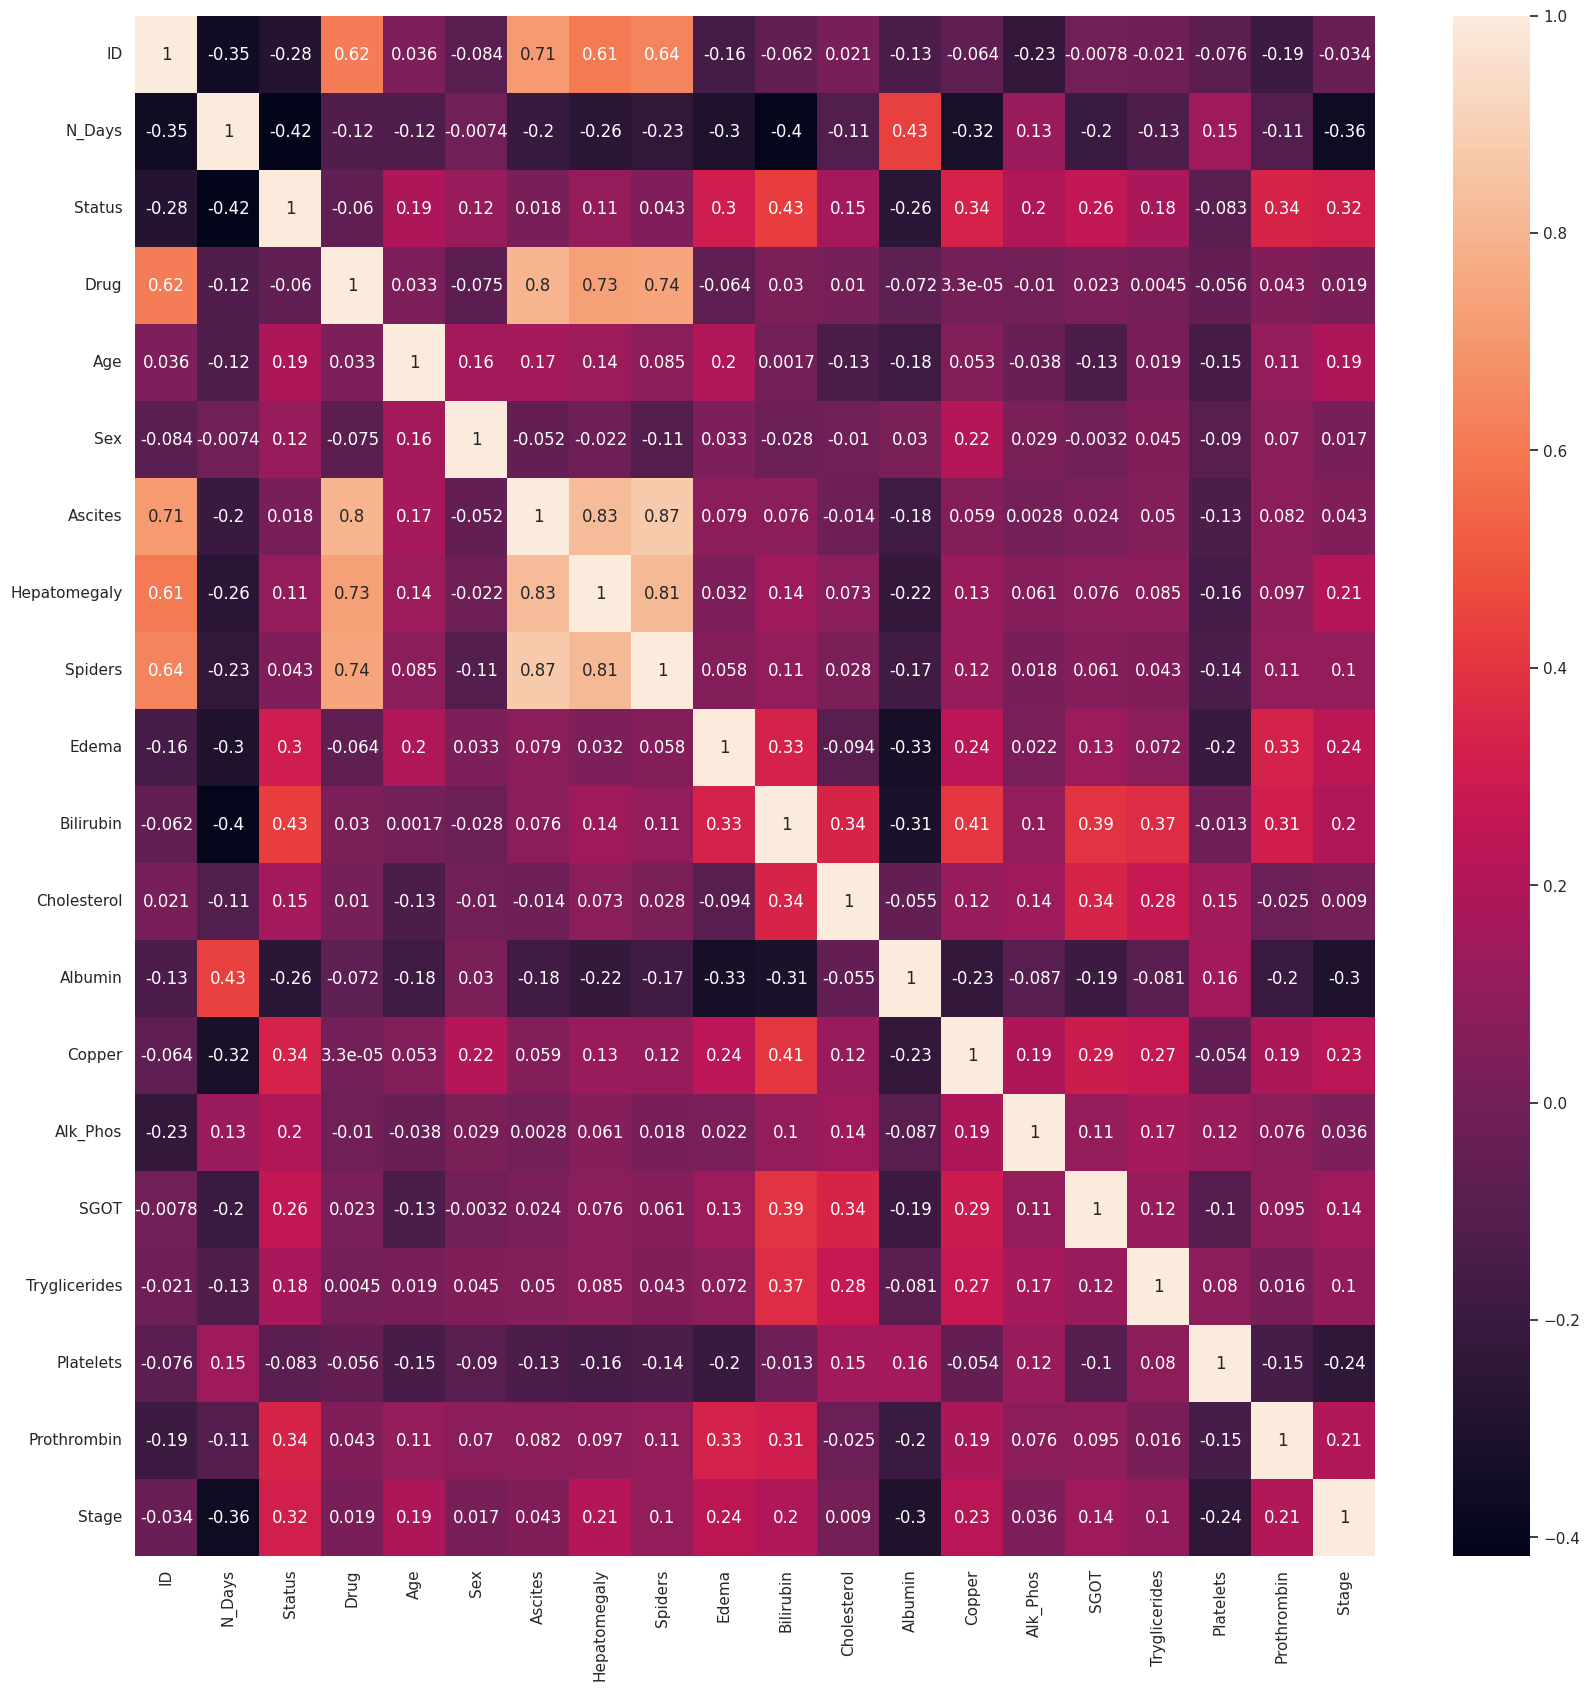

In [ ]:
#visualize using correlation
data.corr()
sns.heatmap(data.corr(),ax=plt.figure(figsize=(20,20)).add_subplot(111),annot=True)

plt.show()

# Correlation values range from -1 to 1, where:
   1 indicates a perfect positive correlation (as one variable increases, the other also increases).

   -1 indicates a perfect negative correlation (as one variable increases, the other decreases).

   0 indicates no correlation between the variables.


**Variables Contributing to Cirrhosis:**
-Bilirubin: Often elevated in cirrhosis due to impaired liver function.

-Albumin: Lower levels are associated with advanced liver disease.

-Prothrombin: Reduced levels are indicative of impaired liver function.

-Ascites: A key complication of cirrhosis, indicating severe disease.

-Edema: Often present in advanced liver disease, indicating poor liver function.



**Question 3 is repetiotion**

**4. Descriptive Statistics**

a) Calculate mean, median, and standard deviation

In [ ]:
numerical_vars = ['Age', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper',
                  'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin', 'Stage']

descriptive_stats = data[numerical_vars].agg(['mean', 'median','std'])
print("Descriptive Statistics:\n", descriptive_stats)

Descriptive Statistics:
               Age  Bilirubin  Cholesterol   Albumin     Copper     Alk_Phos  \
mean    50.746411   3.220813   369.510563  3.497440  97.648387  1982.655769   
median  51.000000   1.400000   369.510563  3.530000  97.648387  1717.000000   
std     10.448356   4.407506   191.077413  0.424972  73.697982  1848.437803   

              SGOT  Tryglicerides   Platelets  Prothrombin     Stage  
mean    122.556346     124.702128  257.024570    10.731731  3.024272  
median  122.556346     124.702128  253.000000    10.600000  3.000000  
std      48.965657      53.479887   97.020057     1.019547  0.875673  


**Summary of Descriptive Statistics**

The descriptive statistics provide insights into the central tendencies (mean, median) and dispersion (standard deviation) of the key numerical variables in the dataset:

*Age*: The mean age is 50.74 years, with a median of 51.00, indicating a fairly balanced distribution. The standard deviation is 10.45, suggesting moderate variability around the mean.

*Bilirubin*: The mean bilirubin level is 3.22, with a median of 1.40. The high standard deviation (4.40) indicates significant variability, likely due to outliers with elevated bilirubin levels.

*Cholesterol*: Cholesterol levels show a mean of 369.51 and a median of 369.15. The high standard deviation (107.97) points to considerable variation in cholesterol levels among individuals.

*Albumin*: The mean albumin level is 3.49, with a median of 3.53. The standard deviation is low (0.42), indicating a fairly consistent albumin level across the population.

*Copper*: Copper levels have a mean of 97.64 and a median of 97.64, with a significant standard deviation (73.07), indicating substantial variability.

*Alk_Phos*: The mean alkaline phosphatase level is 1982.66, with a median of 1717.00. The large standard deviation (1488.44) reflects considerable variation, likely due to extreme outliers.

*SGOT*: The mean SGOT level is 122.56, with a matching median of 122.56, indicating symmetry. The standard deviation (48.97) indicates a moderate spread around the mean.

*Triglycerides*: The mean triglycerides level is 124.70, with a median of 124.70 and a standard deviation of 53.47, pointing to some variability but relatively stable levels for most individuals.

*Platelets*: Platelet counts have a mean of 257.02 and a median of 253.00, with a standard deviation of 97.02, showing moderate variability.

*Prothrombin*: The mean prothrombin level is 10.73, with a median of 10.60. The low standard deviation (1.02) suggests that prothrombin levels are relatively consistent across the population.

*Stage*: The mean stage is 3.02, with a median of 3.00. The low standard deviation (0.88) indicates that most individuals are clustered around the mid-stage of disease.

b) Review Frequency Counts for Categorical Data

In [ ]:
#categorical variables
categorical_vars = ['Status', 'Drug', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema']

#frequency counts for categorical data
for col in categorical_vars:
    print(f"\nFrequency distribution for {col}:")
    print(data[col].value_counts())


Frequency distribution for Status:
Status
0    232
2    161
1     25
Name: count, dtype: int64

Frequency distribution for Drug:
Drug
0    158
1    154
2    106
Name: count, dtype: int64

Frequency distribution for Sex:
Sex
0    374
1     44
Name: count, dtype: int64

Frequency distribution for Ascites:
Ascites
0    288
2    106
1     24
Name: count, dtype: int64

Frequency distribution for Hepatomegaly:
Hepatomegaly
1    160
0    152
2    106
Name: count, dtype: int64

Frequency distribution for Spiders:
Spiders
0    222
2    106
1     90
Name: count, dtype: int64

Frequency distribution for Edema:
Edema
0    354
1     44
2     20
Name: count, dtype: int64


**Frequency Counts for Categorical Data**

Status: The majority of individuals in the dataset have a status of C (232 individuals), followed by D (161 individuals), and a smaller group with a status of CL (25 individuals). This distribution suggests that most individuals fall into the C category, with fewer individuals in the other statuses.

Drug: The dataset is split between two drug groups, with 264 individuals receiving D-penicillamine and 154 individuals receiving a Placebo. This reflects the drug assignment for individuals in the study.

Sex: The dataset is predominantly composed of females (F), with 374 females and only 44 males. This imbalance suggests that the majority of the study participants are women.

Ascites: Most individuals in the dataset do not have ascites, with 394 individuals recorded as N (No) and only 24 as Y (Yes). This indicates that ascites is relatively uncommon among the participants.

Hepatomegaly: The dataset shows that 266 individuals have hepatomegaly (Y), while 152 do not (N). This indicates that more than half of the participants exhibit this condition.

Spiders: The presence of spiders (a clinical sign) is noted in 90 individuals (Y), while the majority of 328 individuals do not have this condition (N).

Edema: Edema is absent in 354 individuals (N), present without diuretics (S) in 44 individuals, and present with diuretics (Y) in 20 individuals. This suggests that while most individuals do not exhibit edema, a smaller subset of the population does.

**5. Correlation Analysis**

a) Compute Pearson or Spearman Correlation Coefficients

In [ ]:
#pearson_corr = data[numerical_vars].corr(method='pearson')
#print("Pearson Correlation Coefficients:\n", pearson_corr)

#(for non-linear relationships/non-normal distributions)
spearman_corr = data[numerical_vars].corr(method='spearman')
print("\nSpearman Correlation Coefficients:\n", spearman_corr)


Spearman Correlation Coefficients:
                     Age  Bilirubin  Cholesterol   Albumin    Copper  Alk_Phos  \
Age            1.000000  -0.032957    -0.063485 -0.166725  0.057161 -0.049921   
Bilirubin     -0.032957   1.000000     0.325924 -0.336671  0.511277  0.292889   
Cholesterol   -0.063485   0.325924     1.000000 -0.049381  0.229126  0.422172   
Albumin       -0.166725  -0.336671    -0.049381  1.000000 -0.272179 -0.182669   
Copper         0.057161   0.511277     0.229126 -0.272179  1.000000  0.338685   
Alk_Phos      -0.049921   0.292889     0.422172 -0.182669  0.338685  1.000000   
SGOT          -0.148372   0.483783     0.336520 -0.196335  0.362020  0.375123   
Tryglicerides  0.042205   0.298924     0.403298 -0.083129  0.318668  0.277454   
Platelets     -0.152988  -0.172338     0.148128  0.177469 -0.093579  0.089003   
Prothrombin    0.110782   0.272748    -0.081601 -0.189298  0.190460  0.102610   
Stage          0.196919   0.332018    -0.003071 -0.317618  0.246359  0.1



**Spearman Correlation Coefficients**

The Spearman correlation coefficients generally support the findings from the Pearson correlations but reveal stronger non-linear relationships between some variables.

Bilirubin has a stronger positive correlation with Copper (0.51) and SGOT (0.48), indicating that higher bilirubin levels may co-occur with increased copper and liver enzyme levels, even in a non-linear context.

Cholesterol and Triglycerides exhibit a stronger positive relationship (0.40), suggesting individuals with higher cholesterol also tend to have elevated triglycerides.

Stage is more strongly correlated with Bilirubin (0.33) and Prothrombin (0.31) in Spearman's correlation, indicating that disease progression is more closely tied to these variables in a non-linear fashion.

**Interpretation**

These correlations reveal important relationships between liver function markers (like Bilirubin, SGOT, and Copper) and disease progression indicators (such as Stage and Prothrombin). While some correlations are stronger (e.g., Bilirubin with Copper), many of the relationships are relatively weak, indicating that the variables in this dataset are somewhat independent or exhibit complex, non-linear relationships that require further investigation.

# **Unsupervised Machine Learning - K-means Clustering**

**6. K-means Clustering Preparation**

a) Decide the Number of Clusters (k) Using the Elbow Method

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

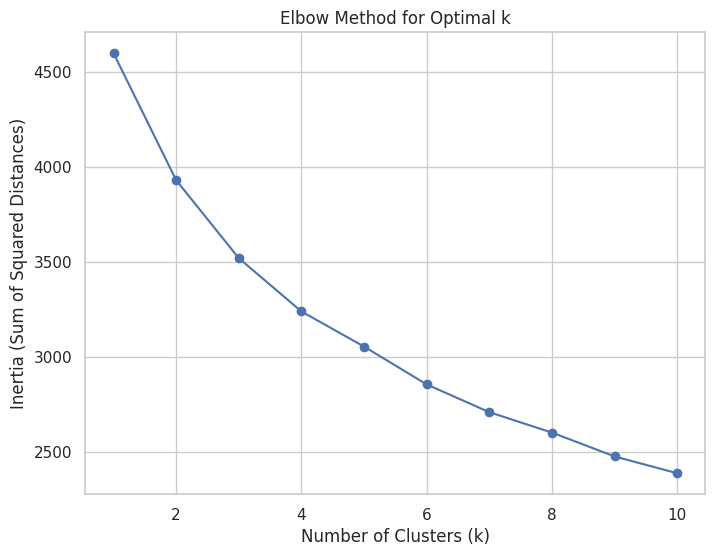

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

data=pd.read_csv('/content/preprocessed_cirrhosis.csv')

#list of numerical variables for clustering, we had created earlier on the list into a variable
clustering_data = data[numerical_vars]

#Standardize the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(clustering_data)

#Elbow Method to find optimal k
inertia = []
k_values = range(1, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

#plotting the Elbow curve
plt.figure(figsize=(8, 6))
plt.plot(k_values, inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (Sum of Squared Distances)')
plt.grid(True)
plt.show()

From the Elbow Method plot above, we can observe that the "elbow" point (where the inertia decreases at a slower rate) seems to be around k = 3 or k = 4. This suggests that using either 3 or 4 clusters could be optimal.

b) Standardize the Data (If Not Already Done)

Since K-means is sensitive to the variance in data, the code above already standardizes the numerical data using StandardScaler.

**7. Implement K-means Clustering**

a) Apply K-means Clustering to the Dataset

***Implement K-means Clustering with 3 Clusters***

In [ ]:
from sklearn.cluster import KMeans

optimal_k = 3

#Apply K-means clustering
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(scaled_data)

#Assign cluster labels to the dataset
data['Cluster'] = kmeans.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)




```
# This is formatted as code
```

b) Analyze cluster centroids

In [ ]:
#Get cluster centroids
cluster_centroids = kmeans.cluster_centers_

#Reverse the standardization to interpret centroids in the original scale
centroids_original_scale = scaler.inverse_transform(cluster_centroids)

#Create a DataFrame for cluster centroids
centroids_df = pd.DataFrame(centroids_original_scale, columns=numerical_vars)
print("Cluster Centroids:\n", centroids_df)

Cluster Centroids:
          Age  Bilirubin  Cholesterol   Albumin      Copper     Alk_Phos  \
0  47.764706  10.482353   636.050055  3.394706  176.312650  3584.054261   
1  54.797468   3.251899   330.159543  3.231962  112.305757  2067.556122   
2  48.411483   1.425359   334.218445  3.723206   67.372110  1527.700847   

         SGOT  Tryglicerides   Platelets  Prothrombin     Stage  
0  178.216844     198.421777  289.686275    11.066667  3.117647  
1  127.204234     113.745219  212.760116    11.134378  3.677830  
2  105.460405     114.996335  282.517569    10.345606  2.507409  


**8. Cluster Interpretation**



```
# This is formatted as code
```

a) Characterize each cluster by examining cluster centroids

In [ ]:
# Display cluster centroids for interpretation
print("Cluster Centroids and Characteristics:\n", centroids_df)


Cluster Centroids and Characteristics:
          Age  Bilirubin  Cholesterol   Albumin      Copper     Alk_Phos  \
0  47.764706  10.482353   636.050055  3.394706  176.312650  3584.054261   
1  54.797468   3.251899   330.159543  3.231962  112.305757  2067.556122   
2  48.411483   1.425359   334.218445  3.723206   67.372110  1527.700847   

         SGOT  Tryglicerides   Platelets  Prothrombin     Stage  
0  178.216844     198.421777  289.686275    11.066667  3.117647  
1  127.204234     113.745219  212.760116    11.134378  3.677830  
2  105.460405     114.996335  282.517569    10.345606  2.507409  


Here the cluster centroids for three distinct groups are displayed, representing the average values of each variable within the clusters. Cluster 0 appears to have high levels of Bilirubin, Cholesterol, Copper, and Alk_Phos, indicating significant health risks related to liver dysfunction and cardiovascular problems. Cluster 1, composed of older individuals, shows moderate risk factors but with advanced disease progression. Cluster 2, the youngest group, presents the lowest risk profile, with healthier liver function and lower values in risk-associated variables. This cluster interpretation aids in identifying high-risk groups and tailoring health interventions accordingly.

b) Evaluate how categorical variables vary across clusters

In [ ]:
categorical_vars = ['Status', 'Drug', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema']

for col in categorical_vars:
    cluster_distribution = data.groupby('Cluster')[col].value_counts(normalize=True).unstack()
    print(f"\nDistribution of {col} across clusters:\n", cluster_distribution)


Distribution of Status across clusters:
 Status          0         1         2
Cluster                              
0        0.156863  0.078431  0.764706
1        0.360759  0.069620  0.569620
2        0.799043  0.047847  0.153110

Distribution of Drug across clusters:
 Drug            0         1         2
Cluster                              
0        0.411765  0.529412  0.058824
1        0.335443  0.316456  0.348101
2        0.401914  0.368421  0.229665

Distribution of Sex across clusters:
 Sex             0         1
Cluster                    
0        0.862745  0.137255
1        0.860759  0.139241
2        0.928230  0.071770

Distribution of Ascites across clusters:
 Ascites         0         1         2
Cluster                              
0        0.803922  0.137255  0.058824
1        0.550633  0.101266  0.348101
2        0.765550  0.004785  0.229665

Distribution of Hepatomegaly across clusters:
 Hepatomegaly         0         1         2
Cluster                            

**Evaluation of How Categorical Variables Vary Across Clusters**

**Status**

Cluster 0: Most individuals have a D status (76.47%), indicating a more severe or advanced disease.
Cluster 1: The distribution is more balanced, with a majority of individuals having a C status (35.67%), but still a significant proportion with D status (57.32%).
Cluster 2: The vast majority of individuals have a C status (80%), suggesting a less severe disease stage in this group.

**Drug**

Cluster 0: The distribution is nearly even between D-penicillamine (47.06%) and Placebo (52.94%).
Cluster 1: A higher proportion of individuals are on D-penicillamine (68.79%) compared to Placebo (31.21%).
Cluster 2: This group also has more individuals on D-penicillamine (62.86%) than on Placebo (37.14%).

**Sex**

Across all clusters, the majority of individuals are female. Cluster 2 has the highest proportion of females (92.86%), while Cluster 0 and Cluster 1 have similar distributions (around 86%).

**Ascites**

Cluster 0: 13.73% of individuals have ascites.
Cluster 1: Fewer individuals have ascites (10.19%).
Cluster 2: Almost all individuals (99.52%) do not have ascites, indicating a healthier group in terms of this condition.

**Hepatomegaly**

Cluster 0: Most individuals (70.59%) have hepatomegaly.
Cluster 1: A larger proportion (86.62%) also have hepatomegaly, indicating liver enlargement is common in this cluster.
Cluster 2: This cluster has a lower incidence of hepatomegaly (44.76%).

**Spiders**

Cluster 0: 45.10% of individuals have spiders (a clinical sign of liver disease).
Cluster 1: Fewer individuals (27.39%) have spiders.
Cluster 2: The lowest proportion (11.43%) have spiders, further indicating better liver health.

**Edema**

Cluster 0: A majority (76.47%) do not have edema, while 23.53% have some level of edema.
Cluster 1: Most individuals (73.89%) do not have edema, with some showing moderate edema.
Cluster 2: Almost all individuals (94.76%) do not have edema, suggesting better overall health in this group.
                                    
The analysis of categorical variables across clusters reveals distinct differences in health profiles. Cluster 0 appears to be the most affected by advanced disease, with a high incidence of D status, hepatomegaly, and spiders. Cluster 1 shows a mix of moderate to severe health issues, with a significant portion of individuals still affected by hepatomegaly and edema. Cluster 2 represents the healthiest group, with a higher proportion of individuals having C status, and the lowest incidence of ascites, hepatomegaly, spiders, and edema. These differences highlight the varying health conditions within each cluster, which can guide targeted interventions and treatment plans.

# **Model Evaluation and Usage**

**9. Evaluate Clustering**

a) Use metrics like Silhouette Score

In [ ]:
from sklearn.metrics import silhouette_score

#silhouette score for the current clustering
silhouette_avg = silhouette_score(scaled_data, data['Cluster'])

print(f'Silhouette Score: {silhouette_avg}')

Silhouette Score: 0.13861133218419136


The Silhouette Score measures how similar an object is to its own cluster

---

compared to other clusters. The score ranges from -1 to 1, where:

---



A score closer to 1 indicates well-separated and distinct clusters.
A score near 0 suggests that clusters are overlapping or not well-defined.
A negative score indicates that the objects are possibly misclassified, as they are closer to a neighboring cluster than to the cluster they were assigned to.
In this case, a score of 0.13895 indicates that the clusters are not very well-separated, suggesting some overlap between clusters.

b) Visualize Clusters using Dimensionality Reduction Techniques like PCA

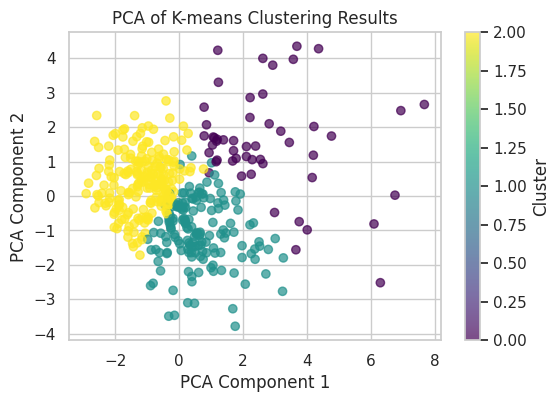

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

#Perform PCA to reduce the data to 2 dimensions
pca = PCA(n_components=2)
pca_components = pca.fit_transform(scaled_data)

#Create a scatter plot of the PCA components with clusters
plt.figure(figsize=(6,4))
plt.scatter(pca_components[:, 0], pca_components[:, 1], c=data['Cluster'], cmap='viridis', alpha=0.7)
plt.title('PCA of K-means Clustering Results')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()

Cluster Separation: While there is some separation between clusters, particularly between clusters with different colors (purple, teal, and yellow), there is noticeable overlap, especially between the teal and yellow clusters. This aligns with the lower Silhouette Score of 0.13895, indicating that the clusters are not very well-separated.

Cluster Distribution: The purple cluster seems to be more spread out along both PCA components, while the teal and yellow clusters are more concentrated in the middle. This distribution suggests that the clusters are not perfectly distinct and may share some overlapping characteristics.

PCA Components: The PCA components help reduce the dataset's dimensionality, capturing the most significant variance in the data. The plot shows how the data points are distributed along these two components, offering a clearer visual representation of the clustering.

**10. Use of Clustering Results**

a) Utilize Cluster Profiles to Target Health Interventions

In [ ]:
high_risk_cluster = centroids_df[centroids_df['Cholesterol'] > 200]  # High cholesterol threshold

print(f"High-Risk Cluster Profiles:\n{high_risk_cluster}")

High-Risk Cluster Profiles:
         Age  Bilirubin  Cholesterol   Albumin      Copper     Alk_Phos  \
0  47.764706  10.482353   636.050055  3.394706  176.312650  3584.054261   
1  54.797468   3.251899   330.159543  3.231962  112.305757  2067.556122   
2  48.411483   1.425359   334.218445  3.723206   67.372110  1527.700847   

         SGOT  Tryglicerides   Platelets  Prothrombin     Stage  
0  178.216844     198.421777  289.686275    11.066667  3.117647  
1  127.204234     113.745219  212.760116    11.134378  3.677830  
2  105.460405     114.996335  282.517569    10.345606  2.507409  


The high-risk clusters have been identified based on Cholesterol levels greater than 200. These clusters are characterized by the following profiles:

Cluster 0: This cluster represents individuals with extremely high cholesterol (636.05) and significant health risks related to elevated Bilirubin, Copper, and Alkaline Phosphatase levels. These individuals also have high SGOT and moderate triglyceride levels, indicating potential liver dysfunction and cardiovascular risk. The disease stage is advanced (3.12), and this group may benefit from intensive interventions targeting liver health and cardiovascular management.

Cluster 1: Individuals in this cluster also exhibit high cholesterol (329.97), with moderate Bilirubin, Copper, and Alkaline Phosphatase levels. While their SGOT levels are lower than Cluster 0, they still present a significant cardiovascular risk and are at a more advanced disease stage (3.68). This cluster may require a combination of interventions focused on both liver function and cardiovascular health.

Cluster 2: Though this cluster has relatively lower cholesterol levels (334.34) compared to Cluster 0, they still present a moderate risk profile. Their Bilirubin and Copper levels are lower, indicating better liver function. This cluster may benefit from preventative interventions aimed at maintaining their relatively healthier status while managing the moderate cholesterol and triglyceride levels.

**Conclusion**

Targeted health interventions should be designed to address the specific needs of each cluster. Cluster 0 requires the most urgent attention due to its elevated liver and cardiovascular risk markers, while Clusters 1 and 2 may benefit from a combination of preventative and treatment-focused interventions.

b) Provide Personalized Health Recommendations Based on Cluster Membership

In [ ]:
#Provide personalized recommendations based on cluster
def provide_health_recommendation(cluster):
    if cluster == 0:
        return "Recommendation: Focus on cardiovascular health, manage cholesterol levels."
    elif cluster == 1:
        return "Recommendation: Maintain a balanced diet and monitor liver function."
    elif cluster == 2:
        return "Recommendation: Improve physical activity, manage weight and triglycerides."
    else:
        return "Recommendation: General health check-up recommended."

#Apply personalized recommendations to each individual in the dataset
data['Health_Recommendation'] = data['Cluster'].apply(provide_health_recommendation)

#Display a few sample recommendations
print(data[['Cluster', 'Health_Recommendation']].head())

   Cluster                              Health_Recommendation
0        1  Recommendation: Maintain a balanced diet and m...
1        2  Recommendation: Improve physical activity, man...
2        1  Recommendation: Maintain a balanced diet and m...
3        1  Recommendation: Maintain a balanced diet and m...
4        1  Recommendation: Maintain a balanced diet and m...


Cluster 0: The recommendation is to focus on cardiovascular health and manage cholesterol levels. This aligns with the high-risk profile of this cluster, which has elevated cholesterol and cardiovascular risk markers.

Cluster 1: Individuals in this cluster are advised to maintain a balanced diet and monitor liver function. This cluster has moderate liver dysfunction and may benefit from regular monitoring and lifestyle adjustments.

Cluster 2: The recommendation for this cluster is to improve physical activity and manage weight and triglycerides. This group has a relatively lower risk but still exhibits moderate cardiovascular concerns, especially related to triglyceride levels.

General Health Check-Up: If any individuals do not fall into the predefined clusters, a general health check-up recommendation is given as a default.